<a href="https://colab.research.google.com/github/brookegrantham/depression-twitter-thesis/blob/main/RoBERTa_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-4ae1f185-2af6-799a-fe52-f8d3f0711a7c)


In [ ]:
!pip install simpletransformers

In [4]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!rm -R cache_dir runs sc_output wandb

In [9]:
import gc
import torch
def empty_gpu():
    model = None
    model_scratch = None
    gc.collect()
    torch.cuda.empty_cache()
empty_gpu()

In [ ]:
while True:pass

ROBERTA-LARGE MODEL


In [4]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import classification_report, accuracy_score, f1_score

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
os.environ["WANDB_DISABLED"] = "true"
model_args = ClassificationArgs(
    use_multiprocessing=False, 
    use_multiprocessing_for_evaluation=False,
    num_train_epochs=6,
    learning_rate=0.000005797,
    output_dir= "sc_output",
    overwrite_output_dir=True,
    wandb_project= "ELECTRA - Pretrain 2",
    wandb_kwargs = {"name": "Continued Fine-tune msl=256, epoch=1, balanced"},
    max_seq_length=256
)


# f = pd.read_csv("reddit_text.txt", sep='\t')
f = pd.read_csv('reddit_set.csv', usecols=['text','label'])
train, temp = train_test_split(f, test_size=0.3, random_state=123)
val, test = train_test_split(temp, test_size=(1/3), random_state=123)
labels = ['control', 'moderate', 'severe']

model = ClassificationModel('roberta',
                            'roberta-large',
                            args=model_args,
                            num_labels=3)

# Train the model
model.train_model(train)

#continued training
import sklearn
import wandb
# Evaluate the model
result, model_outputs, predictions = model.eval_model(val, acc=accuracy_score,  cr=classification_report)
 
pred = model_outputs.argmax(axis=1)

wandb.sklearn.plot_confusion_matrix(val.label.tolist(), pred, labels, normalize='true')

f = open('PRETRAIN Results', 'a')
f.write('\n')
f.write('CONTINUED FROM robertas large MODEL')
f.write('\n')
f.write('MSL = 256, epoch=1, balanced')
f.write('\n')
f.write(classification_report(val.label.tolist(),pred))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score( val.label.tolist(),pred)))
f.write('\n')
f.write('Macro F1 Score:')
f.write(str(f1_score(val.label.tolist(),pred, average='weighted')))
f.write('\n')
# f.write(confusion_matrix(val.label.tolist(),pred,normalize='true'))
f.close()
print(result)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classi

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:613: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Running Epoch 0 of 6:   0%|          | 0/514 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/514 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/514 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/514 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/514 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/514 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/147 [00:00<?, ?it/s]

Training loss,█▆█▇▅▆▇▇▅▅▃▆▅▇▃▃▄▂▃▆▅▃▂▃▃▅▃▃▁▆▂▄▃▂▄▃▂▂▁▄
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▅████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.57113
global_step,3050
lr,0.0


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


{'mcc': 0.3849737285754472, 'acc': 0.6354344122657581, 'cr': '              precision    recall  f1-score   support\n\n         0.0       0.66      0.59      0.62       481\n         1.0       0.65      0.66      0.66       577\n         2.0       0.51      0.70      0.59       116\n\n    accuracy                           0.64      1174\n   macro avg       0.61      0.65      0.62      1174\nweighted avg       0.64      0.64      0.64      1174\n', 'eval_loss': 1.0793203626360213}


In [5]:
df = pd.DataFrame(model_outputs)
df['pred']= pred
df['true']=val.label.tolist()
df['text']=val.text.tolist()
df.to_csv('val_LARGE.csv')

SET UP PRETRAIN TEXT

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os


all_text = []

df = pd.read_table('reddit-pretrain-text', header=None)
df.columns = ["text"]
# df = pd.read_csv("reddit_text.txt", sep='\t')


texts = df.text.tolist()
texts = [t for t in texts if isinstance(t, str)]
all_text.extend(texts)

train, test = train_test_split(all_text, test_size=0.1)


with open("train.txt", "w") as f:
    for line in train:
        f.write(line + "\n")

with open("test.txt", "w") as f:
    for line in test:
        f.write(line + "\n")

PRETRAINING CONTINUED FROM ROBERTA-BASE

In [5]:
'''CONTINUED FROM ROBERTA-BASE MODEL'''

import logging
import os


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "num_train_epochs": 5,
    "save_eval_checkpoints": True,
    "save_model_every_epoch": False,
    "save_steps" : -1,
    "learning_rate": 4e-5,
    "train_batch_size": 50,
    "eval_batch_size": 128,
    "gradient_accumulation_steps": 1,
    "block_size": 128,
    "max_seq_length": 128,
    "dataset_type": "simple",
    "wandb_project": "ROBERTA - Pretrain FINAL",
    "wandb_kwargs": {"name": "Pre-ROBERTA-BASE-test pls work"},
    "logging_steps": 100,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 50000,
    "evaluate_during_training_verbose": True,
    "use_cached_eval_features": True,
    "sliding_window": True,
    "vocab_size": 50265,
    "generator_config": {
        "embedding_size": 768,
        "hidden_size": 256,
        "num_hidden_layers": 3,
    },
    "discriminator_config": {
        "embedding_size": 128,
        "hidden_size": 256,
    },
} 

from simpletransformers.language_modeling import LanguageModelingModel

train_file = "train.txt"
test_file = "test.txt"

# ROBERTA MLM
model = LanguageModelingModel(
    "roberta",
    'roberta-base',
    args=train_args,
    train_files=train_file,
)

model.train_model(
    train_file, eval_file=test_file,
)


  0%|          | 0/1591484 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Running Epoch 0 of 5:   0%|          | 0/38152 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/174334 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/38152 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/38152 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/38152 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/38152 [00:00<?, ?it/s]

(190760,
 {'global_step': [38152, 50000, 76304, 100000, 114456, 150000, 152608, 190760],
  'perplexity': [tensor(4.1850),
   tensor(4.1208),
   tensor(4.0308),
   tensor(3.9334),
   tensor(3.9186),
   tensor(3.7679),
   tensor(3.7365),
   tensor(3.6602)],
  'eval_loss': [1.4315152020328206,
   1.4160362990003685,
   1.3939728062523509,
   1.3695123977017618,
   1.3657374052587554,
   1.3265217673113419,
   1.3181428844637681,
   1.2975268639236845],
  'train_loss': [1.4574275016784668,
   1.5921027660369873,
   1.2897794246673584,
   1.6860612630844116,
   1.322387933731079,
   1.3409976959228516,
   1.3601893186569214,
   1.729577660560608]})

FINE-TUNE CUSTOM MODEL


In [30]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(123)
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")

transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs(
    use_multiprocessing=False,
    use_multiprocessing_for_evaluation=False,
    output_dir= "sc_output_roberta",
    overwrite_output_dir=True,
    wandb_project= "ROBERTA - Pretrain FINAL",
    wandb_kwargs = {"name": "Pre-ROBERTA-BASE-fine"},
    max_seq_length=256,
    num_train_epochs=6,
    learning_rate=0.000005797,
)

os.environ["TOKENIZERS_PARALLELISM"] = "false"

f = pd.read_csv("reddit_text.txt", sep='\t')
train, temp = train_test_split(f, test_size=0.2, random_state=123)
val, test = train_test_split(temp, test_size=(1/3), random_state=123)
labels = ['control', 'moderate', 'severe']

model = ClassificationModel("roberta", "outputs/best_model", args=model_args, num_labels=3)

# Train the model
model.train_model(train)

Some weights of the model checkpoint at outputs/best_model were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at outputs/best_model and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
Y

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Training loss,█▆▆▇▇▅▅▆▄▆▃▄▄▁▇▁▄▂▂▄
global_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
lr,▁▃▅█████▇▇▇▇▇▇▇▆▆▆▆▆
Training loss,0.72064
global_step,1000
lr,0.0


Running Epoch 0 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

(3528, 0.6571466084780877)

WRITE UP RESULTS


In [31]:
import numpy as np

from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
result, model_outputs, predictions = model.eval_model(val, acc= accuracy_score,  cr=classification_report)
import wandb

pred = model_outputs.argmax(axis=1)

wandb.sklearn.plot_confusion_matrix( pred, val.label.tolist(), [0,1,2], normalize='true')


print(result)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/98 [00:00<?, ?it/s]

Training loss,▇▇▆█▅▆▇▅▄▄▆▇▃▂▂▄█▃▄▇▄▂▁▃▅▅▃▃▆▂▃▃▅▁▂▁▃▁▁▂
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▄████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.42925
global_step,3500
lr,0.0


{'mcc': 0.4435218489048057, 'acc': 0.6781609195402298, 'cr': '              precision    recall  f1-score   support\n\n         0.0       0.70      0.65      0.67       323\n         1.0       0.68      0.73      0.70       383\n         2.0       0.59      0.57      0.58        77\n\n    accuracy                           0.68       783\n   macro avg       0.66      0.65      0.65       783\nweighted avg       0.68      0.68      0.68       783\n', 'eval_loss': 0.7795376096452985}


In [32]:
f = open('FINAL Results2', 'a')
f.write('\n')
f.write('ROBERTA-BASE CONTINUED')
f.write('\n')
f.write('VALIDATION RESULTS')
f.write('\n')
f.write('MSL = 256 EPOCHS = 4')
f.write('\n')
f.write(classification_report(pred, val.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, val.label.tolist())))
f.write('\n')
f.write('Recall Score:')
f.write('\n')
f.write(str(recall_score(pred, val.label.tolist(), average='weighted')))
f.write('\n')
f.write('Precision Score:')
f.write('\n')
f.write(str(precision_score(pred, val.label.tolist(), average='weighted')))
f.write('\n')
f.write('Weighted F1 Score:')
f.write('\n')
f.write(str(f1_score(pred, val.label.tolist(), average='weighted')))
f.write('\n')
f.close()


In [25]:
df = pd.DataFrame(model_outputs)
df['pred']= pred
df['true']=val.label.tolist()
df['text']=val.text.tolist()
df.to_csv('val_res.csv')

In [33]:
#from scratch 
import sklearn
# Evaluate the model
result, model_outputs, predictions = model.eval_model(test, acc=sklearn.metrics.accuracy_score)

pred = model_outputs.argmax(axis=1)

wandb.sklearn.plot_confusion_matrix( pred, test.label.tolist(), labels, normalize='true')

print(result)
f = open('FINAL Results2', 'a')
f.write('\n')
f.write('TEST SET RESULTS')
f.write('\n')
f.write('ROBERTA-BASE CONTINUED')
f.write('\n')
f.write('MSL = 256 EPOCHS = 6')
f.write('\n')
f.write(classification_report(pred, test.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, test.label.tolist())))
f.write('\n')
f.write('Recall Score:')
f.write(str(recall_score(pred, test.label.tolist(),average='weighted')))
f.write('\n')
f.write('Precision Score:')
f.write(str(precision_score(pred, test.label.tolist(),average='weighted')))
f.write('\n')
f.write('Weighted F1 Score:')
f.write(str(f1_score(pred, test.label.tolist(), average='weighted')))
f.write('\n')
f.close()



/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/49 [00:00<?, ?it/s]

{'mcc': 0.35540495549243883, 'acc': 0.6198979591836735, 'eval_loss': 0.9574115519620934}


In [34]:
df = pd.DataFrame(model_outputs)
df['pred']= pred
df['true']=test.label.tolist()
df['text']=test.text.tolist()
df.to_csv('custom-test-res.csv')

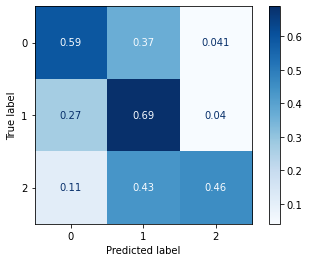

In [35]:
from sklearn.metrics.pairwise import normalize
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(df['true'],df['pred'], cmap='Blues', normalize='true')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/49 [00:00<?, ?it/s]

Training loss,█▇▇▄▅█▇▅▆▃▅▄▅▅▅▂▅▇▂▅▅▃▃▃▇▅▂▃▆▇▁▂▂▁▄▃▂▁▂▄
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▄████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.64545
global_step,3500
lr,0.0


{'mcc': 0.33809486406041156, 'acc': 0.6071428571428571, 'eval_loss': 0.9784292882802536}


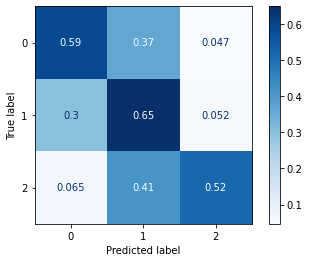

In [36]:

model = ClassificationModel("roberta", "roberta-base", args=model_args, num_labels=3)

# Train the model
model.train_model(train)
result, model_outputs, predictions = model.eval_model(test, acc=sklearn.metrics.accuracy_score)

pred = model_outputs.argmax(axis=1)

df = pd.DataFrame(model_outputs)
df['pred']= pred
df['true']=test.label.tolist()
df['text']=test.text.tolist()
df.to_csv('base-test.csv')

ConfusionMatrixDisplay.from_predictions(df['true'],df['pred'], cmap='Blues', normalize='true')

print(result)
f = open('FINAL Results2', 'a')
f.write('\n')
f.write('TEST SET RESULTS')
f.write('\n')
f.write('ROBERTA-BASE ')
f.write('\n')
f.write('MSL = 256 EPOCHS = 6')
f.write('\n')
f.write(classification_report(pred, test.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, test.label.tolist())))
f.write('\n')
f.write('Recall Score:')
f.write(str(recall_score(pred, test.label.tolist(),average='weighted')))
f.write('\n')
f.write('Precision Score:')
f.write(str(precision_score(pred, test.label.tolist(),average='weighted')))
f.write('\n')
f.write('Weighted F1 Score:')
f.write(str(f1_score(pred, test.label.tolist(), average='weighted')))
f.write('\n')
f.close()


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:613: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/98 [00:00<?, ?it/s]

Training loss,▃▂▂▄▂▃▂▂▄▃▄▃▄▄▂▁▅▂▁█▁▃▂▂▄▁▁▁▁▄▁▆▂▂▃▃▁▁▁▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▄████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.03136
global_step,3500
lr,0.0


{'mcc': 0.346289548654145, 'acc': 0.6181353767560664, 'eval_loss': 1.7996443631697674}


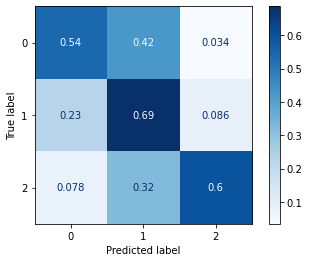

In [37]:


# Train the model
model.train_model(train)
result, model_outputs, predictions = model.eval_model(val, acc=sklearn.metrics.accuracy_score)

pred = model_outputs.argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(val.label.tolist(),pred, cmap='Blues', normalize='true')

print(result)
f = open('FINAL Results2', 'a')
f.write('\n')
f.write('VAL SET RESULTS')
f.write('\n')
f.write('ROBERTA-BASE ')
f.write('\n')
f.write('MSL = 256 EPOCHS = 6')
f.write('\n')
f.write(classification_report(pred, val.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, val.label.tolist())))
f.write('\n')
f.write('Recall Score:')
f.write(str(recall_score(pred, val.label.tolist(),average='weighted')))
f.write('\n')
f.write('Precision Score:')
f.write(str(precision_score(pred, val.label.tolist(),average='weighted')))
f.write('\n')
f.write('Weighted F1 Score:')
f.write(str(f1_score(pred, val.label.tolist(), average='weighted')))
f.write('\n')
f.close()

In [22]:
print(classification_report(test.label.tolist(),pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       172
           1       0.55      0.55      0.55       174
           2       0.62      0.57      0.59        46

    accuracy                           0.58       392
   macro avg       0.59      0.58      0.58       392
weighted avg       0.58      0.58      0.58       392

